## Exploring Berkeley Neural Parser (benepar)

### Based on
- https://github.com/nikitakit/self-attentive-parser/
- https://parser.kitaev.io/

In [1]:
import benepar

import spacy

2021-12-18 17:38:05.943811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 17:38:05.943838: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
parser.download('benepar_en3')

In [2]:
nlp = spacy.load('en_core_web_md')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

In [7]:
doc = nlp("The time for action is now. It's never too late to do something.")
sent = list(doc.sents)[0]
print(sent)

The time for action is now.


In [3]:
parser = benepar.Parser("benepar_en3")

input_sentence = benepar.InputSentence(
    words=['"', 'Fly', 'safely', '.', '"'],
    space_after=[False, True, False, False, False],
    tags=['``', 'VB', 'RB', '.', "''"],
    escaped_words=['``', 'Fly', 'safely', '.', "''"],
)

tree = parser.parse(input_sentence)

print(tree)

(TOP (S (`` ``) (VP (VB Fly) (ADVP (RB safely))) (. .) ('' '')))


/home/lay/Documents/Projects/TCC/explore-nlp-libs/.virtualenv/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


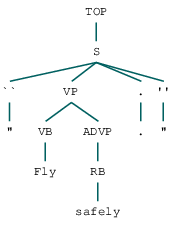

In [5]:
input_sentence = benepar.InputSentence(
    words=['"', 'Fly', 'safely', '.', '"'],
)

parser.parse(input_sentence)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


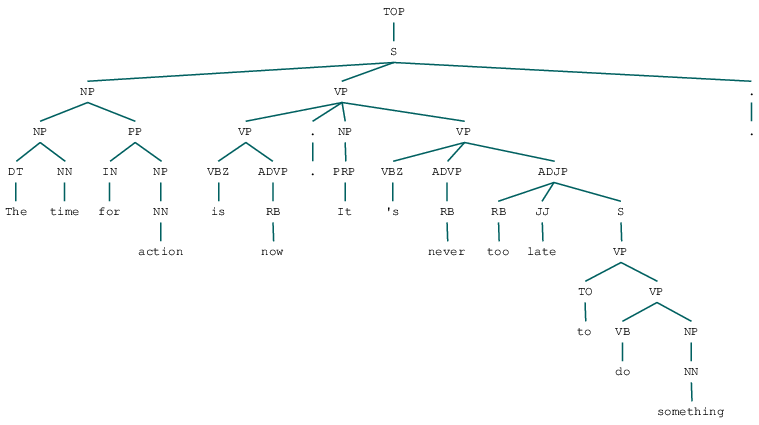

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize

sample = "The time for action is now. It's never too late to do something."

parser.parse(word_tokenize(sample))